In [3]:
import os
import joblib
import numpy as np
import pandas as pd

# Step 1: Define project root and model path
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
model_dir = os.path.join(project_root, "models")

# Step 2: Load the saved models
rf_model_path = os.path.join(model_dir, "rf_best_model.pkl")
xgb_model_path = os.path.join(model_dir, "xgb_best_model.pkl")

rf_model = joblib.load(rf_model_path)
xgb_model = joblib.load(xgb_model_path)

# Step 3: Prediction function
def predict_with_models(X_new):
    """
    Predicts using the loaded Random Forest and XGBoost models.
    
    Parameters:
    X_new (np.ndarray or pd.DataFrame): Feature matrix for new samples.

    Returns:
    dict: Probabilities from both models.
    """
    rf_preds = rf_model.predict_proba(X_new)[:, 1]
    xgb_preds = xgb_model.predict_proba(X_new)[:, 1]
    
    return {
        "rf_probability": rf_preds,
        "xgb_probability": xgb_preds
    }

# Step 4: Example usage
# Replace this with your real input after preprocessing (e.g. Morgan fingerprints)
X_example = np.random.rand(5, rf_model.n_features_in_)  # mock 5 samples

preds = predict_with_models(X_example)

# Display results
print("Random Forest Probabilities:", preds["rf_probability"])
print("XGBoost Probabilities:", preds["xgb_probability"])

Random Forest Probabilities: [0.42978175 0.51727513 0.48147817 0.52548611 0.39867304]
XGBoost Probabilities: [0.01322727 0.01322727 0.01322727 0.01322727 0.01322727]


In [4]:
# Step 1: Define project root and model path
#notebook_dir = os.getcwd()
#project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
#model_dir = os.path.join(project_root, "models")
import sys
import os

sys.path.append(os.path.abspath(".."))
from src.shap_utils import generate_maccs_fingerprint, plot_waterfall_shap1
from src.plot_utils import highlight_top_maccs_features
import pandas as pd
import joblib
from IPython.display import SVG, display
# Load model and background
model = joblib.load("../models/xgb_best_model.pkl")
X_train = joblib.load("../models/X_train.pkl")
feature_names = [f"MACCS_{i}" for i in range(167)]
background_df = pd.DataFrame(X_train, columns=feature_names)

# SMILES input
smiles = "CO[C@H]1CN(CC[C@H]1NC(=O)C2=CC(=C(C=C2OC)N)Cl)CCCOC3=CC=C(C=C3)F"
fingerprint, mol = generate_maccs_fingerprint(smiles)
fingerprint_df = pd.DataFrame([fingerprint], columns=feature_names)

# Plot waterfall
plot_waterfall_shap1(model, fingerprint_df, background_df, feature_names)
import shap
# Highlight top SHAP MACCS features
#svg_output = highlight_top_maccs_features(mol, shap.Explanation(values=model.predict(fingerprint_df), data=fingerprint_df, feature_names=feature_names), feature_names)
#display(SVG(svg_output))

Top 10 SHAP-positive features with bit = 1:
MACCS_103: 0.5050 ↑
MACCS_89: 0.3156 ↑
MACCS_126: 0.2801 ↑
MACCS_108: 0.2433 ↑
MACCS_107: 0.1262 ↑
MACCS_135: 0.0942 ↑
MACCS_152: 0.0931 ↑
MACCS_104: 0.0883 ↑
MACCS_155: 0.0871 ↑
MACCS_134: 0.0708 ↑


In [7]:
import sys
import os

sys.path.append(os.path.abspath(".."))
from src.plot_utils import draw_molecule_with_shap_highlights2
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors, Draw
import numpy as np
from IPython.display import display
from PIL import Image
import io
results = plot_waterfall_shap1(model, fingerprint_df, background_df, feature_names)


mol = Chem.MolFromSmiles("CO[C@H]1CN(CC[C@H]1NC(=O)C2=CC(=C(C=C2OC)N)Cl)CCCOC3=CC=C(C=C3)F")
# Example: shap_values_array and maccs_features should come from your prediction and fingerprint
# Generate MACCS fingerprint
maccs_fp = rdMolDescriptors.GetMACCSKeysFingerprint(mol)
# Convert fingerprint to bit string


top_n_idx = results["top_features"]

shap_values_array = results["shap_values_array"]

Top 10 SHAP-positive features with bit = 1:
MACCS_103: 0.5050 ↑
MACCS_89: 0.3156 ↑
MACCS_126: 0.2801 ↑
MACCS_108: 0.2433 ↑
MACCS_107: 0.1262 ↑
MACCS_135: 0.0942 ↑
MACCS_152: 0.0931 ↑
MACCS_104: 0.0883 ↑
MACCS_155: 0.0871 ↑
MACCS_134: 0.0708 ↑


2025-06-18 16:01:07,761 - DEBUG - Feature 103 SMARTS: Cl
2025-06-18 16:01:07,763 - DEBUG - Match for feature 103: (20,)
2025-06-18 16:01:07,764 - DEBUG - Feature 89 SMARTS: [#8]~*~*~*~[#8]
2025-06-18 16:01:07,765 - DEBUG - Match for feature 89: (10, 9, 11, 16, 17)
2025-06-18 16:01:07,766 - DEBUG - Feature 126 SMARTS: *!@[#8]!@*
2025-06-18 16:01:07,766 - DEBUG - Match for feature 126: (0, 1, 2)
2025-06-18 16:01:07,767 - DEBUG - Feature 108 SMARTS: [CH3]~*~*~*~[CH2]~*
2025-06-18 16:01:07,768 - DEBUG - Match for feature 108: (0, 1, 2, 7, 6, 5)
2025-06-18 16:01:07,769 - DEBUG - Feature 107 SMARTS: [F,Cl,Br,I]~*(~*)~*
2025-06-18 16:01:07,769 - DEBUG - Match for feature 107: (20, 13, 12, 14)
2025-06-18 16:01:07,770 - DEBUG - Feature 135 SMARTS: [#7]!:*:*
2025-06-18 16:01:07,771 - DEBUG - Match for feature 135: (19, 14, 13)
2025-06-18 16:01:07,772 - DEBUG - Feature 152 SMARTS: [#8]~[#6](~[#6])~[#6]
2025-06-18 16:01:07,773 - DEBUG - Match for feature 152: (1, 2, 3, 7)
2025-06-18 16:01:07,774 -

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0']


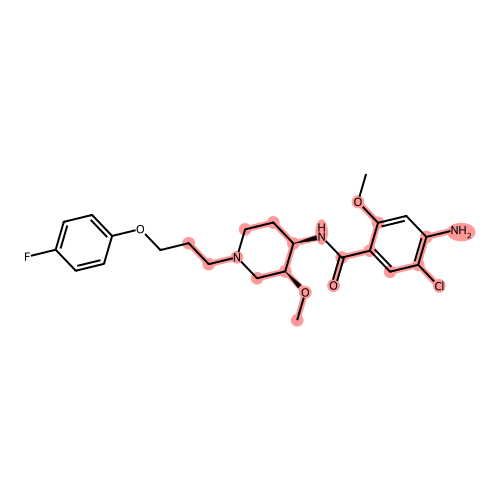

In [8]:
maccs_features = list(maccs_fp.ToBitString()) 
print (maccs_features)
img_bytes = draw_molecule_with_shap_highlights2(mol, shap_values_array, maccs_features, top_n_idx, top_n=10)
display(Image.open(io.BytesIO(img_bytes)))
